In [6]:
from pandas import DataFrame, read_csv
import matplotlib.pyplot as plt
import pandas as pd #this is how I usually import pandas
import sys #only needed to determine Python version number
import matplotlib #only needed to determine Matplotlib version number
import folium as fl
import wordcloud as wc
from wordcloud import STOPWORDS,WordCloud
%matplotlib inline

In [2]:
months = ['\\april','\\febrouary','\march']
months2 = ['febrouary','march','april']
files = ['\listings.csv','\listings0.csv']
# inputPath= r"C:\Users\myrto\Desktop\data"
inputPath= r"C:\Users\nikol\Desktop\dataMining_p1\data\data"
columnlist = ['id','zipcode','transit','bedrooms','beds','review_scores_rating','number_of_reviews','neighbourhood','name','latitude','longitude','last_review','instant_bookable','host_since','host_response_rate','host_identity_verified','host_has_profile_pic','first_review','description','city','cancellation_policy','bed_type','bathrooms','accommodates','amenities','room_type','property_type','price','availability_365','minimum_nights','host_id']

framelist = []
monthlist = []
i=0
for month in months:
    for file in files:
        tempfile = pd.read_csv(inputPath+month+file,index_col=False)
        tempframe = pd.DataFrame(data=tempfile)
        framelist.append(tempframe)
    for l in range(0,len(framelist)-1):
        train = framelist[0].combine_first(framelist[l+1])
    df = pd.DataFrame(data = train, columns=columnlist)
    df.insert(loc=len(df.columns),column='month_id',value=months2[i])
    #df.set_index('id',inplace=True)
    monthlist.append(df)
    i=i+1

df = pd.concat(monthlist)
df.drop_duplicates()
df['price'] = df['price'].apply(lambda x: x.translate(str.maketrans({',':'','$':''})))
df['price'] = pd.to_numeric(df['price'])   

df.to_csv("train.csv")

# df.fillna(df.mean(),inplace=True)
# count_nan = len(temp)-temp.count()
# print(count_nan)

# df
# df.groupby(df.columns,axis=1).transform(lambda x: x.fillna(x.mean(),axis=0))
# temp = df.interpolate(method='ffill')

# pricelist = []
# i=0
# for month in months:
#     tempfile = pd.read_csv(inputPath+month+'\calendar.csv',index_col=False,usecols=['date','price'])
#     tempframe = pd.DataFrame(data=tempfile)
#     tempframe.insert(loc=len(tempframe.columns),column='month_id',value=months2[i])
#     tempframe['price'] = tempframe['price'].apply(lambda x: print(x))
#     # tempframe['price'] = pd.to_numeric(tempframe['price'])   
#     tempframe['price'].fillna(tempframe['price'].mean(),inplace=True)
#     tempframe['date'] = pd.to_datetime(tempframe['date'])
#     pricelist.append(tempframe)
#     i = i+1
# priceDf = pd.concat(pricelist)

In [3]:
# 1
df['room_type'].value_counts().head(1)

Entire home/apt    25530
Name: room_type, dtype: int64

In [4]:
# 2

groupbymonth = df.groupby(by='month_id')
dfaverage = groupbymonth['price'].mean()
dfaverage
# pl = priceDf.sort_values('date',ascending=True)
# pl.head(50)
# plt.plot(pl['date'],pl['price'],'.')
# plt.xticks(rotation='vertical')

# priceDf.plot(kind='line',x='host_since',y='price')
# dfaverage.plot(x='per_month',y='price')


month_id
april        64.36373
febrouary    64.36373
march        64.36373
Name: price, dtype: float64

In [1]:
groupbymonth = priceDf.groupby(by='month_id')
dfaverage = groupbymonth['price'].mean()
dfaverage.plot(x='per_month',y='price')

NameError: name 'priceDf' is not defined

In [8]:
# 3

temp = df[['id','neighbourhood']]
# reviews = r'C:\Users\myrto\Desktop\data\april\reviews.csv'
# reviews0 = r'C:\Users\myrto\Desktop\data\april\reviews0.csv'
reviews = r'C:\Users\nikol\Desktop\dataMining_p1\data\data\april\reviews.csv'
reviews0 = r'C:\Users\nikol\Desktop\dataMining_p1\data\data\april\reviews0.csv'
reviews = pd.read_csv(reviews)
reviews0 = pd.read_csv(reviews0)
reviews = pd.DataFrame(data=reviews)
reviews0 = pd.DataFrame(data=reviews0)
reviews = reviews.combine_first(reviews0)
reviews = reviews[['id','comments']]
#reviews
temp = temp.combine_first(reviews)
temp = temp[['neighbourhood','comments']].groupby('neighbourhood',as_index=False).count()
temp = temp.sort_values(['comments'],ascending=False)
temp.head(5).style.hide_index()


neighbourhood,comments
Plaka,3348
Neos Kosmos,2427
Koukaki,2418
Kolonaki,1833
Pangrati,1806


In [9]:
#4
# df.groupby(by='neighbourhood',as_index=False).agg({'host_id':'sum'})
df.groupby(by='neighbourhood',as_index=False).agg({'host_id':'nunique'}).sort_values(['host_id'],ascending=False,ignore_index=True).head(1).style.hide_index()

# ['host_id'].nunique(5)
# df.groupby(['neighbourhood'])['host_id'].nunique()
# df.neighbourhood.value_counts()
# df.groupby(['neighbourhood'])['host_id'].transform('nunique')


neighbourhood,host_id
Plaka,574


In [1]:
#5
temp = df.groupby('neighbourhood').nunique()
temp = temp['id']
print(temp)
print('\n')

temp = df.groupby('month_id').nunique()
temp = temp['id']
print(temp)


NameError: name 'df' is not defined

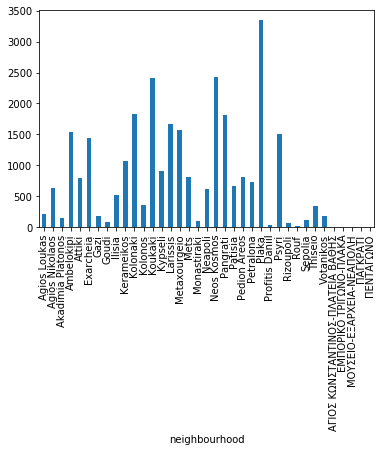

In [10]:
#6
graph = df.groupby(by='neighbourhood').size()
graph.plot.bar(y='Count',x='Neighbourhoods')

In [11]:
#7

temp = df[['room_type','neighbourhood']]
temp = temp.groupby(['neighbourhood','room_type']).size().sort_values(ascending=False)
#temp.to_csv("new.csv")

temp


neighbourhood                     room_type      
Plaka                             Entire home/apt    3063
Neos Kosmos                       Entire home/apt    2241
Koukaki                           Entire home/apt    2199
Kolonaki                          Entire home/apt    1719
Pangrati                          Entire home/apt    1656
                                                     ... 
ΑΓΙΟΣ ΚΩΝΣΤΑΝΤΙΝΟΣ-ΠΛΑΤΕΙΑ ΒΑΘΗΣ  Entire home/apt       2
ΜΟΥΣΕΙΟ-ΕΞΑΡΧΕΙΑ-ΝΕΑΠΟΛΗ          Entire home/apt       2
ΠΕΝΤΑΓΩΝΟ                         Entire home/apt       2
ΠΑΓΚΡΑΤΙ                          Entire home/apt       1
ΕΜΠΟΡΙΚΟ ΤΡΙΓΩΝΟ-ΠΛΑΚΑ            Private room          1
Length: 85, dtype: int64

In [14]:
# 8
df.groupby(by='room_type',as_index=False).agg({'price':'mean'}).sort_values(['price'],ascending=False,ignore_index=True).style.hide_index()

room_type,price
Private room,78.677536
Entire home/apt,62.677673
Shared room,33.425532


In [15]:
# 9
latitude = []
longitude = []
latitude = df['latitude'].tolist()
longitude = df['longitude'].tolist()

m = fl.Map(location=[latitude[0],longitude[0]], zoom_start=12,tiles='Stamen Terrain')

for i, j in zip(range(1,len(latitude)), range(1,len(longitude))):
    fl.Marker(location=[latitude[i], longitude[j]]).add_to(m)
m

NameError: name 'fl' is not defined

In [58]:
# 10










# # tuples = [tuple(x) for x in df['neighbourhood'].values]
# temp = df['neighbourhood']
# newcol = temp.value_counts()
# newdf = DataFrame(data=newcol)
# # newdf.insert(loc=1,column='frequency',value=newcol)
# # newdf
# cl = newcol.tolist()

# t = dict(newdf)
# print(t) 
# # print(cl)
# # d = {}
# # index=0
# # for a in newdf['neighbourhood']:
# #     d[a] = cl[index]
# #     index+=1
# # print(d)
# # print(d)
# # data = dict(zip(df['neighbourhood'].tolist()))
# # wc1 = WordCloud(width=800, height=400, max_words=200).generate_from_frequencies(data)

# # # text = df['neighbourhood'].values
# # # wordcloud2 = WordCloud().generate(' '.join(df['neighbourhood']))
# # # wordcloud.generate_from_frequencies(frequencies=dict(tuples))

# # plt.figure(figsize=(10,10))
# # plt.imshow(data,interpolation='bilinear')
# # plt.axis("off")
# # plt.show()



{'neighbourhood': Plaka                               3348
Neos Kosmos                         2427
Koukaki                             2418
Kolonaki                            1833
Pangrati                            1806
Larissis                            1671
Metaxourgeio                        1575
Ambelokipi                          1533
Psyri                               1512
Exarcheia                           1440
Kerameikos                          1065
Kypseli                              912
Mets                                 813
Pedion Areos                         804
Attiki                               801
Petralona                            735
Patisia                              663
Agios Nikolaos                       627
Neapoli                              621
Ilisia                               528
Kolonos                              357
Thiseio                              336
Agios Loukas                         213
Gazi                                 18